<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/Flower_Classification_with_using_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cu110 (from versions: 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.1.0+cu121.with.pypi.cudnn, 2.1.0+rocm5.5, 2.1.0+rocm5.6, 2.1.1, 2.1.1+cpu, 2.1.1+cpu.cxx11.abi, 2.1.1+cu118, 2.1.1+cu121, 2.1.1+cu121.with.pypi.cudnn, 2.1.1+rocm5.5, 2.1.1+rocm5.6, 2.1.2, 2.1.2+cpu, 2.1.2+cpu.cxx11.abi, 2.1.2+cu118, 2.1.2+cu121, 2.1.2+cu121.with.pypi.cudnn, 2.1.2+rocm5.5, 2.1.2+rocm5.6, 2.2.0, 2.2.0+cpu, 2.2.0+cpu.cxx11.abi, 2.2.0+cu118, 2.2.0+cu121, 2.2.0+rocm5.6, 2.2.0

In [9]:
! [ -e /content ] && pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.6 MB/s eta 0:00:00


In [10]:
import fastai
fastai.__version__

'2.7.18'

In [74]:
from fastai.tabular.all import *

In [75]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/helper_functions.py

--2025-02-18 10:43:21--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10247 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-02-18 10:43:21 (88.1 MB/s) - ‘helper_functions.py.1’ saved [10247/10247]



In [76]:
from helper_functions import unzip_data

In [77]:
unzip_data('/content/flowers.zip')

In [82]:
path = Path("/content/flowers")

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=lambda p: get_image_files(p, recurse=True),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=lambda o: o.parent.name,
    item_tfms=Resize(224)
)
dls = dblock.dataloaders(path)

In [84]:
files = get_image_files(path)
print(files)


[Path('/content/flowers/tulip/16755061382_f6531150c1_n.jpg'), Path('/content/flowers/tulip/8555123165_2fe57eff4f.jpg'), Path('/content/flowers/tulip/483880052_19fdb26a9f.jpg'), Path('/content/flowers/tulip/13562271714_d534531374.jpg'), Path('/content/flowers/tulip/12916441224_2ed63596f8_n.jpg'), Path('/content/flowers/tulip/7046815693_f159e96acd_n.jpg'), Path('/content/flowers/tulip/5565089564_a30c318f44.jpg'), Path('/content/flowers/tulip/7145978709_2d1596f462.jpg'), Path('/content/flowers/tulip/7166560822_27b1d1d132_n.jpg'), Path('/content/flowers/tulip/14067456066_87e15792d0.jpg'), Path('/content/flowers/tulip/4571353297_5634177744_n.jpg'), Path('/content/flowers/tulip/8759597778_7fca5d434b_n.jpg'), Path('/content/flowers/tulip/16594995743_ce72c61201_n.jpg'), Path('/content/flowers/tulip/7002703410_3e97b29da5_n.jpg'), Path('/content/flowers/tulip/7481204112_e3c57dd40a_n.jpg'), Path('/content/flowers/tulip/6187740107_9813ccc41e.jpg'), Path('/content/flowers/tulip/4945315538_97bdd873c

In [85]:
len(files)

4323

In [86]:
from collections import Counter

# Extract image types from file paths
image_types = [Path(f).parent.name for f in files]

# Count occurrences of each image type
type_counts = Counter(image_types)

# Print the common count of each image type
for image_type, count in type_counts.items():
    print(f"Common count of {image_type}: {count}")

Common count of tulip: 984
Common count of rose: 784
Common count of daisy: 769
Common count of dandelion: 1052
Common count of sunflower: 734


In [87]:
print(files[0])
print(files[1000])
print(files[2000])
print(files[3000])
print(files[4000])

/content/flowers/tulip/16755061382_f6531150c1_n.jpg
/content/flowers/rose/5415782938_6ce6e4a90d_n.jpg
/content/flowers/daisy/19544831049_0d738d4872_m.jpg
/content/flowers/dandelion/11545123_50a340b473_m.jpg
/content/flowers/sunflower/26254755_1bfc494ef1_n.jpg


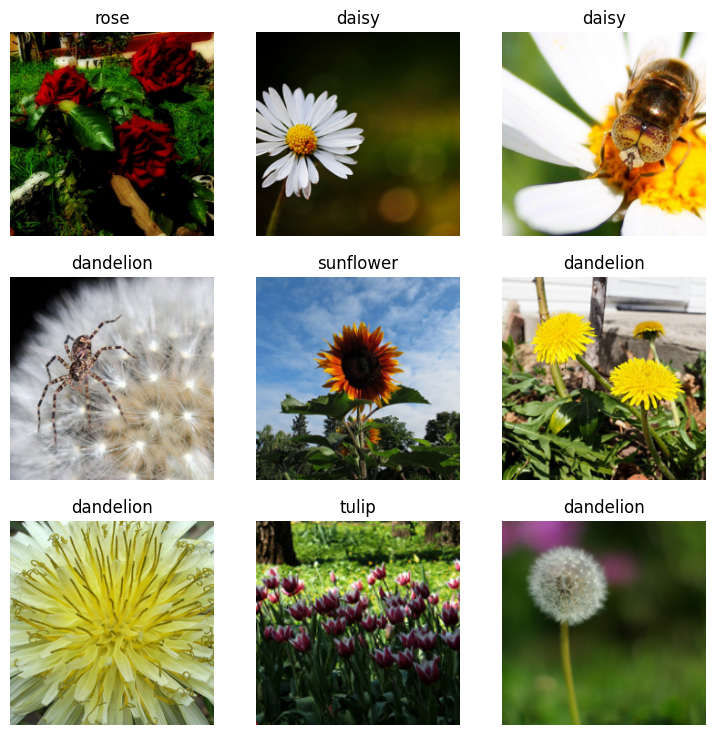

In [88]:
dls.show_batch()

#cnn_learner

In [89]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 107MB/s]


In [90]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.986054,0.402587,0.872685,21:27


epoch,train_loss,valid_loss,accuracy,time
0,0.427592,0.304321,0.901620,31:15
1,0.268515,0.318246,0.914352,31:01
2,0.168052,0.255040,0.928241,31:17
3,0.080945,0.265553,0.928241,31:34
4,0.049708,0.256512,0.932870,31:28


In [91]:
learn.validate()


(#2) [0.25651195645332336,0.9328703880310059]

In [92]:
learn.lr_find()

KeyboardInterrupt: 

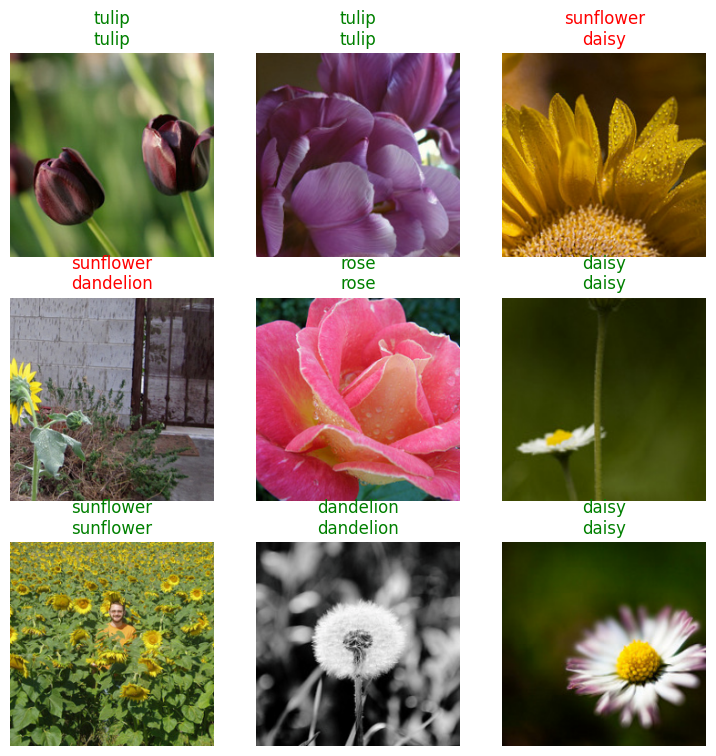

In [93]:
learn.show_results()

#Visualize Results

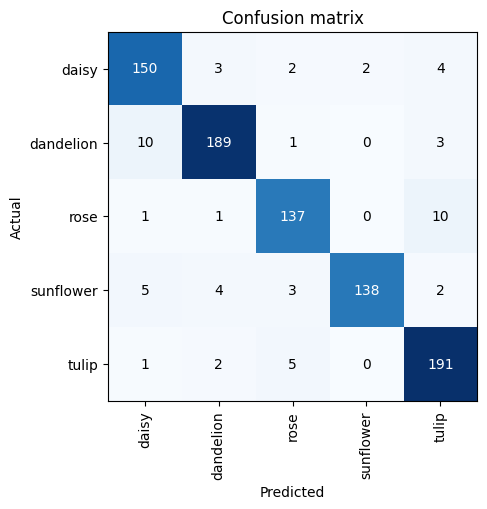

In [94]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

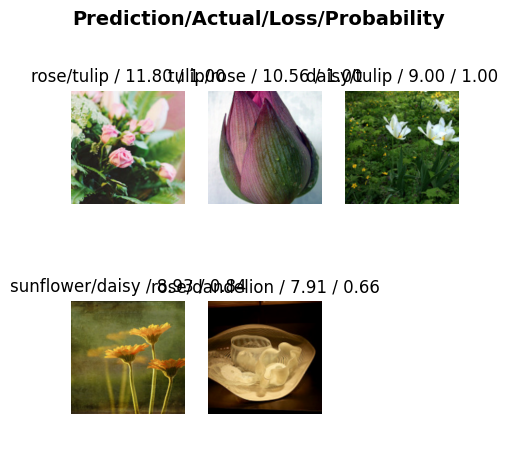

In [95]:
interp.plot_top_losses(5, figsize=(5,5))

#Predict Random Images

Actual Label: dandelion


Predicted Label: dandelion
Probability: 1.0000


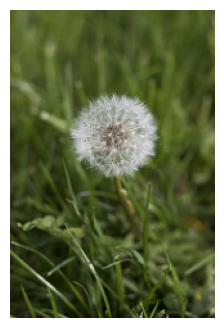

In [96]:
import random
from fastai.vision.all import PILImage

files = get_image_files(path)
random_file = random.choice(files)
img = PILImage.create(random_file)

# Show the image
print(f"Actual Label: {random_file.parent.name}")
img.show()

# Predict
pred, pred_idx, probs = learn.predict(img)
print(f"Predicted Label: {pred}")
print(f"Probability: {probs[pred_idx]:.4f}")

#model save

In [97]:
learn.save('flower-classifier')

Path('models/flower-classifier.pth')